# Chronic Kidney Diseases Prediction

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from matplotlib import pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import warnings as wr
wr.filterwarnings("ignore")

In [7]:
path=r"C:\Users\ADMIN\Downloads\kidney_disease.csv"

In [8]:
df=pd.read_csv(path)

In [9]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [11]:
pd.set_option("display.max_columns",None)

In [12]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


### Feature Selection

In [16]:
df.drop(["id","bp","bgr","rbc","htn","cad","ane","sg","pcc","pcv"],axis=1,inplace=True)

In [17]:
df

,age,al,su,pc,ba,bu,sc,sod,pot,hemo,wc,rc,dm,appet,pe,classification
0,48.0,1.0,0.0,normal,notpresent,36.0,1.2,NaN,NaN,15.4,7800,5.2,yes,good,no,ckd
1,7.0,4.0,0.0,normal,notpresent,18.0,0.8,NaN,NaN,11.3,6000,NaN,no,good,no,ckd
2,62.0,2.0,3.0,normal,notpresent,53.0,1.8,NaN,NaN,9.6,7500,NaN,yes,poor,no,ckd
3,48.0,4.0,0.0,abnormal,notpresent,56.0,3.8,111.0,2.5,11.2,6700,3.9,no,poor,yes,ckd
4,51.0,2.0,0.0,normal,notpresent,26.0,1.4,NaN,NaN,11.6,7300,4.6,no,good,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,0.0,0.0,normal,notpresent,49.0,0.5,150.0,4.9,15.7,6700,4.9,no,good,no,notckd
396,42.0,0.0,0.0,normal,notpresent,31.0,1.2,141.0,3.5,16.5,7800,6.2,no,good,no,notckd
397,12.0,0.0,0.0,normal,notpresent,26.0,0.6,137.0,4.4,15.8,6600,5.4,no,good,no,notckd
398,17.0,0.0,0.0,normal,notpresent,50.0,1.0,135.0,4.9,14.2,7200,5.9,no,good,no,notckd


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   al              354 non-null    float64
 2   su              351 non-null    float64
 3   pc              335 non-null    object 
 4   ba              396 non-null    object 
 5   bu              381 non-null    float64
 6   sc              383 non-null    float64
 7   sod             313 non-null    float64
 8   pot             312 non-null    float64
 9   hemo            348 non-null    float64
 10  wc              295 non-null    object 
 11  rc              270 non-null    object 
 12  dm              398 non-null    object 
 13  appet           399 non-null    object 
 14  pe              399 non-null    object 
 15  classification  400 non-null    object 
dtypes: float64(8), object(8)
memory usage: 50.1+ KB


In [19]:
df.describe()

,age,al,su,bu,sc,sod,pot,hemo
count,391.000000,354.000000,351.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,1.016949,0.450142,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,1.352679,1.099191,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,0.000000,0.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,0.000000,0.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,0.000000,0.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,2.000000,0.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,5.000000,5.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [20]:
df.columns

Index(['age', 'al', 'su', 'pc', 'ba', 'bu', 'sc', 'sod', 'pot', 'hemo', 'wc',
       'rc', 'dm', 'appet', 'pe', 'classification'],
      dtype='object')

In [22]:
df.drop(["appet","pe"],axis=1,inplace=True)

In [27]:
df.rename(columns={"age":"age","al":"albumin","su":"sugar","pc":"pus_cell",
                   "ba":"bacteria","bu":"blood_urea","sc":"serum_creatinine",
                   "sod":"sodium","pot":"potasium","hemo":"hemoglobin","wc":"white_boold_cells",
                   "rc":"red_blood_cells","dm":"diabetes_mellitus","classification":"target"},inplace=True)

In [28]:
df

,age,albumin,sugar,pus_cell,bacteria,blood_urea,serum_creatinine,sodium,potasium,hemoglobin,white_boold_cells,red_blood_cells,diabetes_mellitus,target
0,48.0,1.0,0.0,normal,notpresent,36.0,1.2,NaN,NaN,15.4,7800,5.2,yes,ckd
1,7.0,4.0,0.0,normal,notpresent,18.0,0.8,NaN,NaN,11.3,6000,NaN,no,ckd
2,62.0,2.0,3.0,normal,notpresent,53.0,1.8,NaN,NaN,9.6,7500,NaN,yes,ckd
3,48.0,4.0,0.0,abnormal,notpresent,56.0,3.8,111.0,2.5,11.2,6700,3.9,no,ckd
4,51.0,2.0,0.0,normal,notpresent,26.0,1.4,NaN,NaN,11.6,7300,4.6,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,0.0,0.0,normal,notpresent,49.0,0.5,150.0,4.9,15.7,6700,4.9,no,notckd
396,42.0,0.0,0.0,normal,notpresent,31.0,1.2,141.0,3.5,16.5,7800,6.2,no,notckd
397,12.0,0.0,0.0,normal,notpresent,26.0,0.6,137.0,4.4,15.8,6600,5.4,no,notckd
398,17.0,0.0,0.0,normal,notpresent,50.0,1.0,135.0,4.9,14.2,7200,5.9,no,notckd


In [29]:
df.isnull().sum()

age                    9
albumin               46
sugar                 49
pus_cell              65
bacteria               4
blood_urea            19
serum_creatinine      17
sodium                87
potasium              88
hemoglobin            52
white_boold_cells    105
red_blood_cells      130
diabetes_mellitus      2
target                 0
dtype: int64

In [32]:
df.corr()

,age,albumin,sugar,blood_urea,serum_creatinine,sodium,potasium,hemoglobin
age,1.000000,0.122091,0.220866,0.196985,0.132531,-0.100046,0.058377,-0.192928
albumin,0.122091,1.000000,0.269305,0.453528,0.399198,-0.459896,0.129038,-0.634632
sugar,0.220866,0.269305,1.000000,0.168583,0.223244,-0.131776,0.219450,-0.224775
blood_urea,0.196985,0.453528,0.168583,1.000000,0.586368,-0.323054,0.357049,-0.610360
serum_creatinine,0.132531,0.399198,0.223244,0.586368,1.000000,-0.690158,0.326107,-0.401670
sodium,-0.100046,-0.459896,-0.131776,-0.323054,-0.690158,1.000000,0.097887,0.365183
potasium,0.058377,0.129038,0.219450,0.357049,0.326107,0.097887,1.000000,-0.133746
hemoglobin,-0.192928,-0.634632,-0.224775,-0.610360,-0.401670,0.365183,-0.133746,1.000000


# Data Visualization

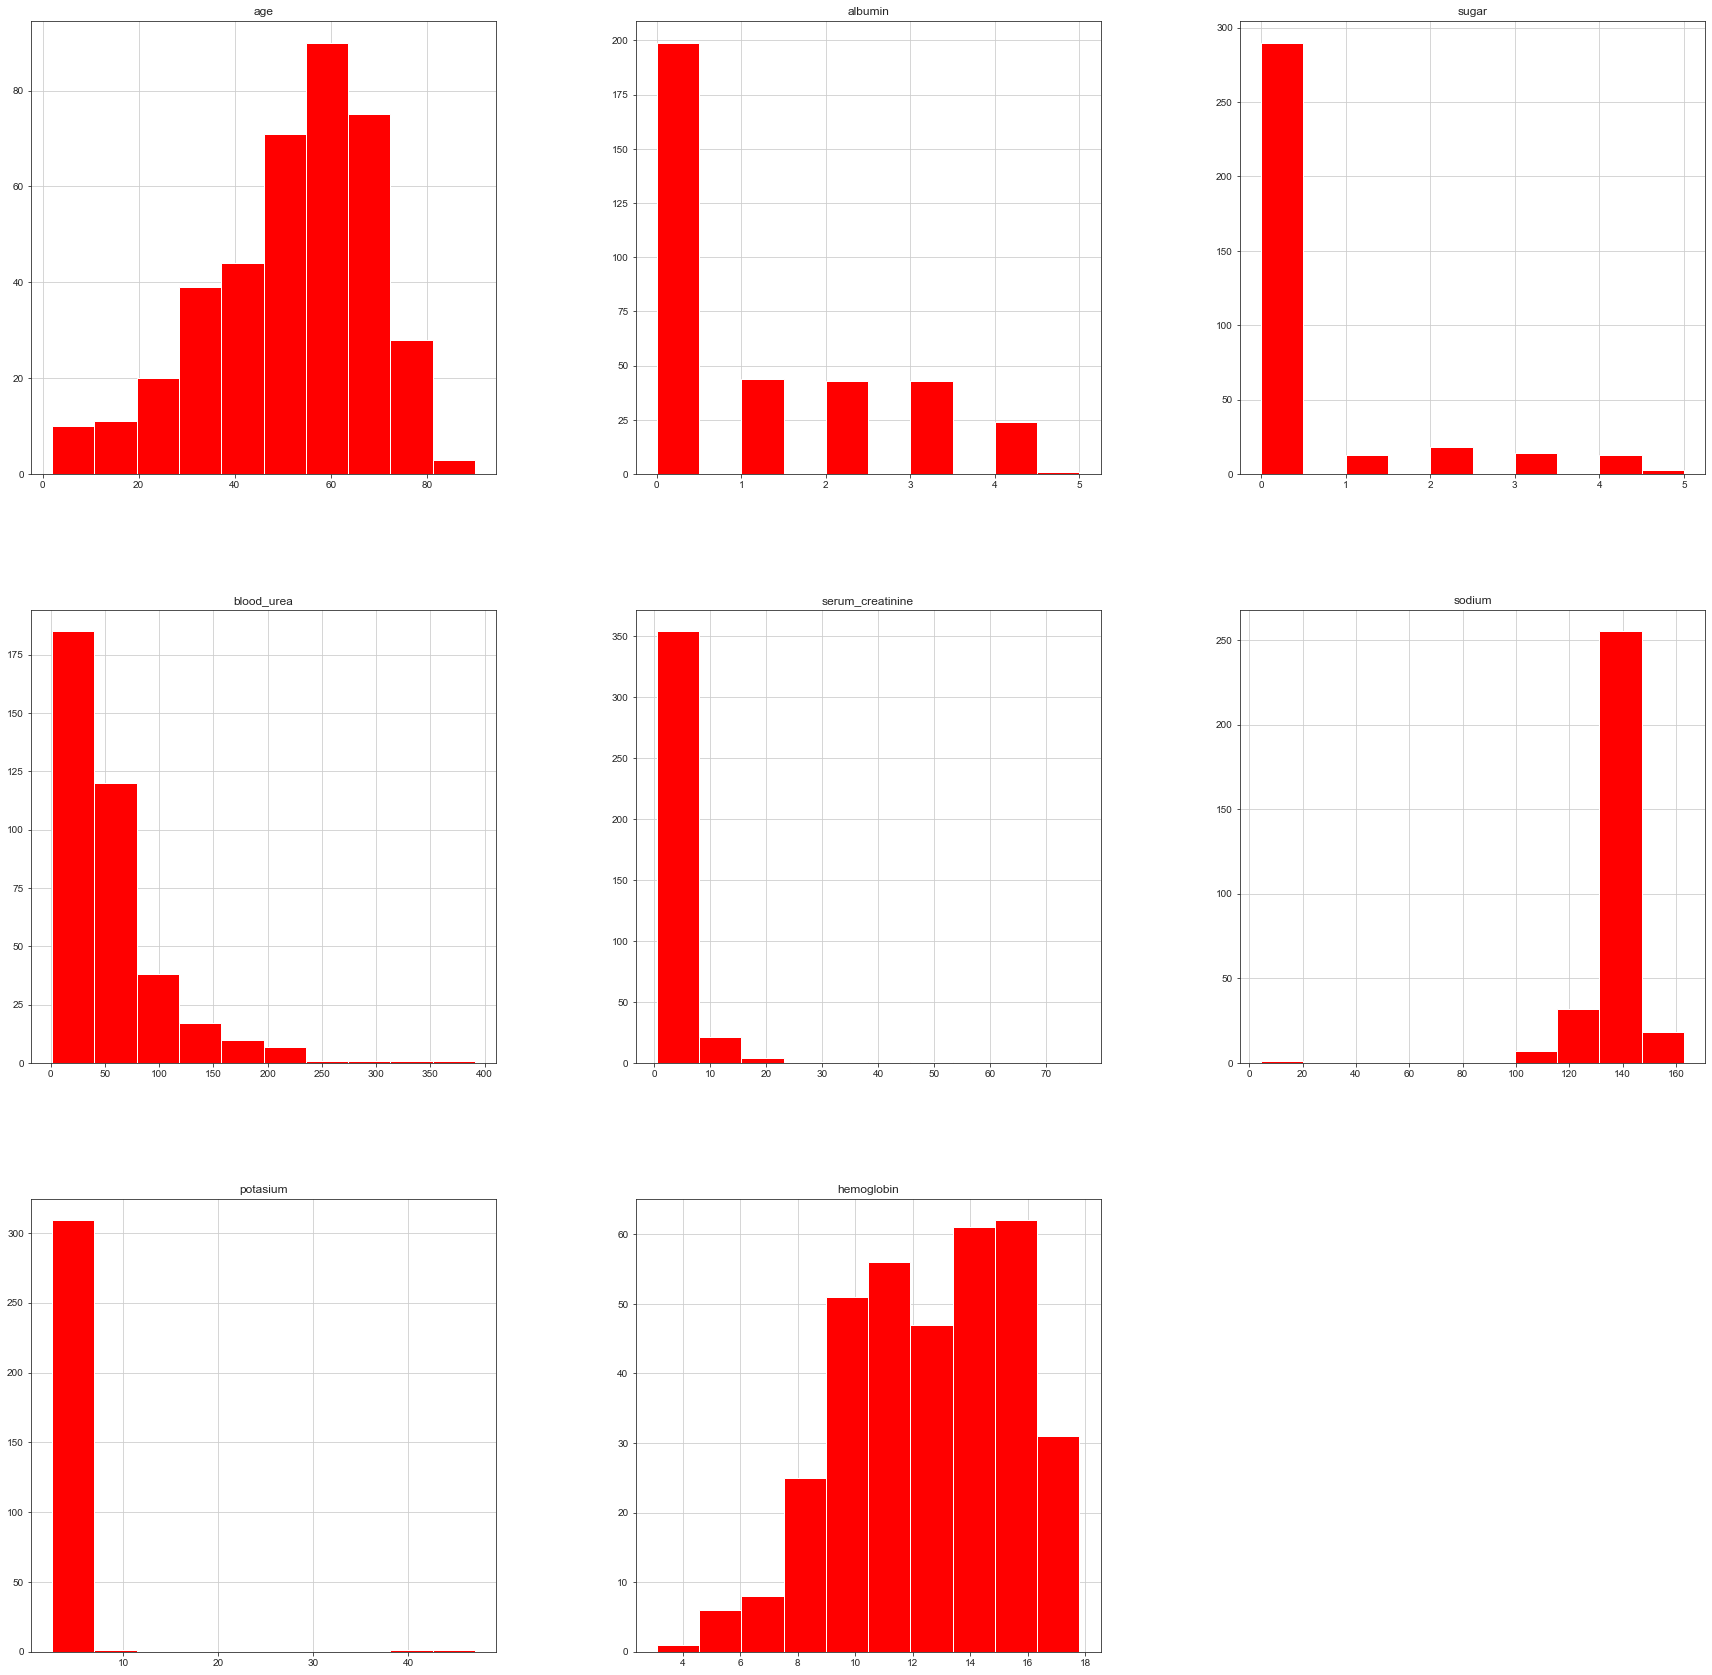

In [30]:
sns.set_style('ticks')
df.hist(figsize=(30,30),color="red")
plt.show()

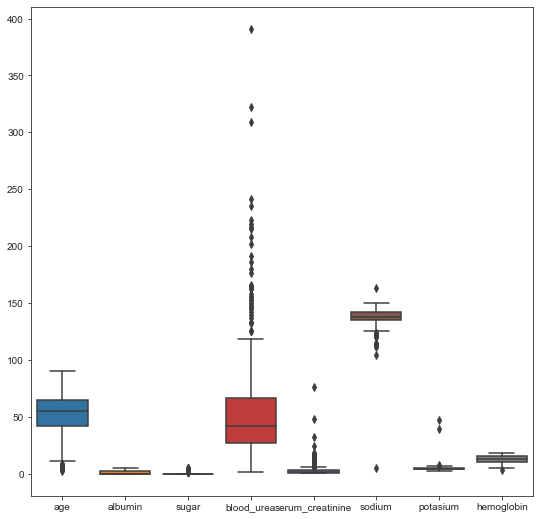

In [31]:

plt.figure(figsize=(9,9))
sns.boxplot(data=df)
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

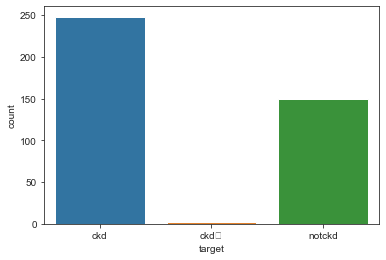

In [33]:
sns.countplot(df["target"])

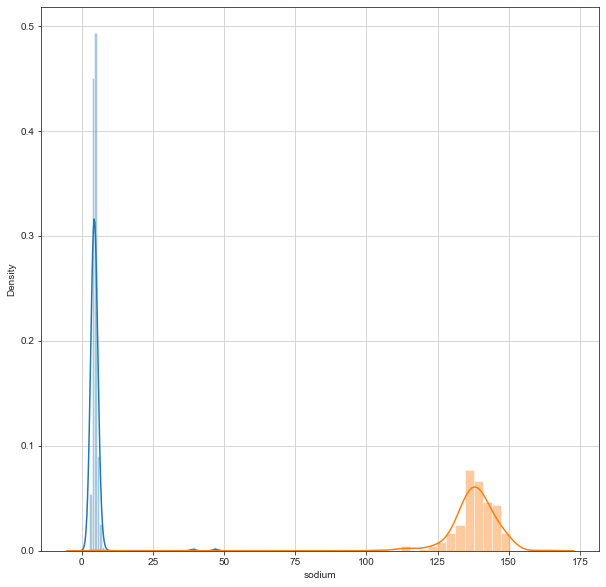

In [35]:
plt.figure(figsize=(10,10))
sns.distplot(df["potasium"])
sns.distplot(df["sodium"])
plt.grid(True)

# preprocessing the data

In [36]:
df

,age,albumin,sugar,pus_cell,bacteria,blood_urea,serum_creatinine,sodium,potasium,hemoglobin,white_boold_cells,red_blood_cells,diabetes_mellitus,target
0,48.0,1.0,0.0,normal,notpresent,36.0,1.2,NaN,NaN,15.4,7800,5.2,yes,ckd
1,7.0,4.0,0.0,normal,notpresent,18.0,0.8,NaN,NaN,11.3,6000,NaN,no,ckd
2,62.0,2.0,3.0,normal,notpresent,53.0,1.8,NaN,NaN,9.6,7500,NaN,yes,ckd
3,48.0,4.0,0.0,abnormal,notpresent,56.0,3.8,111.0,2.5,11.2,6700,3.9,no,ckd
4,51.0,2.0,0.0,normal,notpresent,26.0,1.4,NaN,NaN,11.6,7300,4.6,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,0.0,0.0,normal,notpresent,49.0,0.5,150.0,4.9,15.7,6700,4.9,no,notckd
396,42.0,0.0,0.0,normal,notpresent,31.0,1.2,141.0,3.5,16.5,7800,6.2,no,notckd
397,12.0,0.0,0.0,normal,notpresent,26.0,0.6,137.0,4.4,15.8,6600,5.4,no,notckd
398,17.0,0.0,0.0,normal,notpresent,50.0,1.0,135.0,4.9,14.2,7200,5.9,no,notckd


In [37]:
df["pus_cell"].value_counts()

normal      259
abnormal     76
Name: pus_cell, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()

In [42]:
df["pus_cell"]=le.fit_transform(df["pus_cell"])

In [43]:
df["pus_cell"].value_counts()

1    259
0     76
2     65
Name: pus_cell, dtype: int64

In [44]:
df["bacteria"].value_counts()

notpresent    374
present        22
Name: bacteria, dtype: int64

In [45]:
df["bacteria"]=le.fit_transform(df["bacteria"])

In [46]:
df["bacteria"].value_counts()

0    374
1     22
2      4
Name: bacteria, dtype: int64

In [47]:
df["diabetes_mellitus"].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: diabetes_mellitus, dtype: int64

In [50]:
p={"no":"no","yes":"yes","\tno":"no","\tyes":"yes"}

In [52]:
df["diabetes_mellitus"]=df["diabetes_mellitus"].map(p)

In [54]:
df["diabetes_mellitus"].value_counts()

no     261
yes    136
Name: diabetes_mellitus, dtype: int64

In [55]:
df["diabetes_mellitus"]=le.fit_transform(df["diabetes_mellitus"])

In [56]:
df["diabetes_mellitus"].value_counts()

0    261
1    136
2      3
Name: diabetes_mellitus, dtype: int64

In [57]:
df["target"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: target, dtype: int64

In [62]:
q={"ckd":"positive","notckd":"negative","ckd\t":"positive"}

In [63]:
df["target"]=df["target"].map(q)

In [65]:
df["target"].value_counts()

positive    250
negative    150
Name: target, dtype: int64

In [66]:
df["target"]=le.fit_transform(df["target"])

In [67]:
df["target"].value_counts()

1    250
0    150
Name: target, dtype: int64

In [68]:
df

,age,albumin,sugar,pus_cell,bacteria,blood_urea,serum_creatinine,sodium,potasium,hemoglobin,white_boold_cells,red_blood_cells,diabetes_mellitus,target
0,48.0,1.0,0.0,1,0,36.0,1.2,NaN,NaN,15.4,7800,5.2,1,1
1,7.0,4.0,0.0,1,0,18.0,0.8,NaN,NaN,11.3,6000,NaN,0,1
2,62.0,2.0,3.0,1,0,53.0,1.8,NaN,NaN,9.6,7500,NaN,1,1
3,48.0,4.0,0.0,0,0,56.0,3.8,111.0,2.5,11.2,6700,3.9,0,1
4,51.0,2.0,0.0,1,0,26.0,1.4,NaN,NaN,11.6,7300,4.6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,0.0,0.0,1,0,49.0,0.5,150.0,4.9,15.7,6700,4.9,0,0
396,42.0,0.0,0.0,1,0,31.0,1.2,141.0,3.5,16.5,7800,6.2,0,0
397,12.0,0.0,0.0,1,0,26.0,0.6,137.0,4.4,15.8,6600,5.4,0,0
398,17.0,0.0,0.0,1,0,50.0,1.0,135.0,4.9,14.2,7200,5.9,0,0


In [69]:
from sklearn.impute import SimpleImputer

In [72]:
imputer=SimpleImputer(strategy="most_frequent")

In [74]:
data=imputer.fit_transform(df)

In [76]:
data=pd.DataFrame(data)

In [78]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [82]:
data.rename(columns={0:"age",1:"albumin",2:"sugar",3:"pus_cell",
                   4:"bacteria",5:"blood_urea",6:"serum_creatinine",
                   7:"sodium",8:"potasium",9:"hemoglobin",10:"white_boold_cells",
                   11:"red_blood_cells",12:"diabetes_mellitus",13:"target"},inplace=True)

In [84]:
data

,age,albumin,sugar,pus_cell,bacteria,blood_urea,serum_creatinine,sodium,potasium,hemoglobin,white_boold_cells,red_blood_cells,diabetes_mellitus,target
0,48.0,1.0,0.0,1,0,36.0,1.2,135.0,3.5,15.4,7800,5.2,1,1
1,7.0,4.0,0.0,1,0,18.0,0.8,135.0,3.5,11.3,6000,5.2,0,1
2,62.0,2.0,3.0,1,0,53.0,1.8,135.0,3.5,9.6,7500,5.2,1,1
3,48.0,4.0,0.0,0,0,56.0,3.8,111.0,2.5,11.2,6700,3.9,0,1
4,51.0,2.0,0.0,1,0,26.0,1.4,135.0,3.5,11.6,7300,4.6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,0.0,0.0,1,0,49.0,0.5,150.0,4.9,15.7,6700,4.9,0,0
396,42.0,0.0,0.0,1,0,31.0,1.2,141.0,3.5,16.5,7800,6.2,0,0
397,12.0,0.0,0.0,1,0,26.0,0.6,137.0,4.4,15.8,6600,5.4,0,0
398,17.0,0.0,0.0,1,0,50.0,1.0,135.0,4.9,14.2,7200,5.9,0,0


## Model Building

In [144]:
x=data.drop(["target"],axis=1)
y=df["target"]

In [145]:
from sklearn.model_selection import train_test_split

In [147]:
from sklearn.feature_selection import SelectFromModel

In [148]:
from sklearn.linear_model import Lasso

In [149]:
x[x=="\t?"].count()

age                  0
albumin              0
sugar                0
pus_cell             0
bacteria             0
blood_urea           0
serum_creatinine     0
sodium               0
potasium             0
hemoglobin           0
white_boold_cells    1
red_blood_cells      1
diabetes_mellitus    0
dtype: int64

In [160]:
x["white_boold_cells"]=x["white_boold_cells"].replace("\t?",7500)
x["red_blood_cells"]=x["red_blood_cells"].replace("\t?",3.9)

In [161]:
x[x=="\t?"].count()

age                  0
albumin              0
sugar                0
pus_cell             0
bacteria             0
blood_urea           0
serum_creatinine     0
sodium               0
potasium             0
hemoglobin           0
white_boold_cells    0
red_blood_cells      0
diabetes_mellitus    0
red_boold_cells      0
dtype: int64

In [162]:
x

,age,albumin,sugar,pus_cell,bacteria,blood_urea,serum_creatinine,sodium,potasium,hemoglobin,white_boold_cells,red_blood_cells,diabetes_mellitus,red_boold_cells
0,48.0,1.0,0.0,1,0,36.0,1.2,135.0,3.5,15.4,7800,5.2,1,5.2
1,7.0,4.0,0.0,1,0,18.0,0.8,135.0,3.5,11.3,6000,5.2,0,5.2
2,62.0,2.0,3.0,1,0,53.0,1.8,135.0,3.5,9.6,7500,5.2,1,5.2
3,48.0,4.0,0.0,0,0,56.0,3.8,111.0,2.5,11.2,6700,3.9,0,3.9
4,51.0,2.0,0.0,1,0,26.0,1.4,135.0,3.5,11.6,7300,4.6,0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,0.0,0.0,1,0,49.0,0.5,150.0,4.9,15.7,6700,4.9,0,4.9
396,42.0,0.0,0.0,1,0,31.0,1.2,141.0,3.5,16.5,7800,6.2,0,6.2
397,12.0,0.0,0.0,1,0,26.0,0.6,137.0,4.4,15.8,6600,5.4,0,5.4
398,17.0,0.0,0.0,1,0,50.0,1.0,135.0,4.9,14.2,7200,5.9,0,5.9


In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [182]:
select=SelectFromModel(Lasso(alpha=0.005,random_state=1))

In [183]:
select.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=1))

In [184]:
select.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
from sklearn.neighbors import KNeighborsClassifier


In [187]:
from sklearn.ensemble import RandomForestClassifier


In [188]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
lr=LogisticRegression()

In [190]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm="brute")

In [191]:
rf=RandomForestClassifier(n_estimators=100)

In [192]:
dt=DecisionTreeClassifier()

In [193]:
from xgboost import XGBClassifier

In [200]:
def Classifier(model):
    print("selected Model is :  ",model)
    
    print("-------"*15)
    
    print(" accouracy is : ")
    
    return model.fit(x_train,y_train), model.score(x_test,y_test)


In [201]:
Classifier(lr)

selected Model is :   LogisticRegression()
---------------------------------------------------------------------------------------------------------
 accouracy is : 


(LogisticRegression(), 0.95)

In [203]:
Classifier(rf)

selected Model is :   RandomForestClassifier()
---------------------------------------------------------------------------------------------------------
 accouracy is : 


(RandomForestClassifier(), 1.0)

In [204]:
xgb=XGBClassifier()

In [206]:
Classifier(dt)

selected Model is :   DecisionTreeClassifier()
---------------------------------------------------------------------------------------------------------
 accouracy is : 


(DecisionTreeClassifier(), 0.9625)

In [207]:
Classifier(knn)

selected Model is :   KNeighborsClassifier(algorithm='brute')
---------------------------------------------------------------------------------------------------------
 accouracy is : 


(KNeighborsClassifier(algorithm='brute'), 0.6875)

## RandomForestClassifier

In [215]:
from sklearn.metrics import confusion_matrix

In [216]:
from sklearn.metrics import accuracy_score,classification_report

In [217]:
y_pred=rf.predict(x_test)

In [218]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        47

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [219]:
print("accuracy of model is : ",accuracy_score(y_test,y_pred))

accuracy of model is :  1.0


In [221]:
confusion_matrix(y_pred,y_test)

array([[33,  0],
       [ 0, 47]], dtype=int64)

<AxesSubplot:>

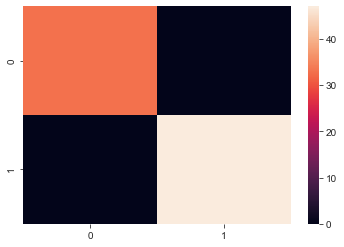

In [222]:
sns.heatmap(confusion_matrix(y_pred,y_test))

In [224]:
pd.DataFrame({"actual_values":y_test,"predicted_values":y_pred})

,actual_values,predicted_values
398,0,0
125,1,1
328,0,0
339,0,0
172,1,1
...,...,...
347,0,0
41,1,1
180,1,1
132,1,1


In [225]:
import pickle

In [228]:
pickle.dump(rf,open("kidneydiseas","wb"))

In [229]:
model=pickle.load(open("kidneyDiseas","rb"))

In [230]:
model

RandomForestClassifier()